# ECBM E4040 - Assignment 2- Task 5: Kaggle Open-ended Competition

Kaggle is a platform for predictive modelling and analytics competitions in which companies and researchers post data and statisticians and data miners compete to produce the best models for predicting and describing the data.

If you don't have a Kaggle account, feel free to join at [www.kaggle.com](https://www.kaggle.com). To let the TAs do the grading more conveniently, please use Lionmail to join Kaggle and use UNI as your username.

Visit the website for this competition to join: 
https://www.kaggle.com/t/80bbe298c9cb40fb9388637d8cbcdcd4

Details about this in-class competition is shown on the website above. Please read carefully.

<span style="color:red">__TODO__:</span>
1. Train a custom model for the bottle dataset classification problem. You are free to use any methods taught in the class or found by yourself on the Internet (ALWAYS provide reference to the source). General training methods include:
    * Dropout
    * Batch normalization
    * Early stopping
    * l1-norm & l2-norm penalization
2. You'll be given the test set to generate your predictions (70% public + 30% private, but you don't know which ones are public/private). Achieve 70% accuracy on the public test set. The accuracy will be shown on the public leaderboard once you submit your prediction .csv file. 
3. (A) Report your results on the Kaggle, for comparison with other students' optimization results (you should do this several times). (C) Save your best model, using BitBucket, at the same time when you (B) submit the homework files into Courseworks. See instructions below. 

__Hint__: You can start from what you implemented in task 4. Another classic classification model named 'VGG16' can also be easily implemented.

## HW Submission Details:
There are three components to reporting the results of this task: 

**(A) Submission (possibly several submissions) of the .csv prediction file throught the Kaggle platform;**. You should start doing this VERY early, so that students can compare their work as they are making progress with model optimization.

**(B) Editing and submitting the content of this Jupyter notebook, through Courseworks; **
(i) The code for your CNN model and for the training function. The code should be stored in __./ecbm4040/neuralnets/kaggle.py__;
(ii) Print out your training process and accuracy __within this notebook__;

**(C) Submitting your best CNN model through instructor-owned private BitBucket repo.**

**Description of (C):** 
For this task, you will be utilizing bitbucket to save your model for submission. Bitbucket provides Git code managment. For those who are not familiar with git operations, please check [Learn Git with Bitbucket Cloud](https://www.atlassian.com/git/tutorials/learn-git-with-bitbucket-cloud) as reference.
**TAs will create a private Bitbucket repository for each student, with the write access. This repo will be owned by the instructors. Make sure to properly submit your model to that exact repository (submissions to your own private repository will not count)** Students need to populate the following file to provide instructors with bitbucket account information: https://docs.google.com/spreadsheets/d/13Ot_9gr4DIx11ugEQ2EOC6y6gn3PtmxCQbvXU9p6NrE/edit#gid=0.

<span style="color:red">__Submission content:__ :</span>
(i) Upload your best model with all the data output (for example, __MODEL.data-00000-of-00001, MODEL.meta, MODEL.index__) into the  BitBucket. Store your model in the folder named "__KaggleModel__" within the BitBucket repository. 
Remember to delete any intermediate results, **we only want your best model. Do not upload any data files**. The instructors will rerun the uploaded best model and verify against the score which you reported on the Kaggle.



In [1]:
#Only for the first run to save the files as pickle

import glob
from PIL import Image
import numpy as np
import pickle

file = '../../kaggle/train_128/0/'
arr = []
for i in range(3000):
    fname = file + str(i) +'.png'
    arr.append(np.array(Image.open(fname)))
X_0 = np.array(arr)
y_0 = np.ones(X_0.shape[0])*0

file = '../../kaggle/train_128/1/'
arr = []
for i in range(3000):
    fname = file + str(3000+i) +'.png'
    arr.append(np.array(Image.open(fname)))
X_1 = np.array(arr)
y_1 = np.ones(X_1.shape[0])*1

file = '../../kaggle/train_128/2/'
arr = []
for i in range(3000):
    fname = file + str(3000*2+i) +'.png'
    arr.append(np.array(Image.open(fname)))
X_2 = np.array(arr)
y_2 = np.ones(X_2.shape[0])*2

file = '../../kaggle/train_128/3/'
arr = []
for i in range(3000):
    fname = file + str(3000*3+i) +'.png'
    arr.append(np.array(Image.open(fname)))
X_3 = np.array(arr)
y_3 = np.ones(X_3.shape[0])*3

file = '../../kaggle/train_128/4/'
arr = []
for i in range(3000):
    fname = file + str(3000*4+i) +'.png'
    arr.append(np.array(Image.open(fname)))
X_4 = np.array(arr)
y_4 = np.ones(X_4.shape[0])*4

X_total = np.vstack((X_0,X_1,X_2,X_3,X_4))
y_total = np.hstack((y_0,y_1,y_2,y_3,y_4))

file = '../../kaggle/test_128/'
arr = []
for i in range(3500):
    fname = file + str(i) +'.png'
    arr.append(np.array(Image.open(fname)))
X_test = np.array(arr)

with open('X.pickle', 'wb') as handle:
    pickle.dump(X_total, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('y.pickle', 'wb') as handle:
    pickle.dump(y_total, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('X_test.pickle', 'wb') as handle:
    pickle.dump(X_test, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.image as img
import pickle as pickle

from __future__ import print_function
from ecbm4040.neuralnets.kaggle import my_training,my_training_task4,prediction_on_test
import tensorflow as tf

In [2]:
# YOUR CODE HERE
with open('X.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('y.pickle', 'rb') as handle:
    y_train = pickle.load(handle)
    
    

[3. 0. 4. 4. 0. 3. 0. 0. 2. 2. 1. 0. 2. 1. 3. 4.]


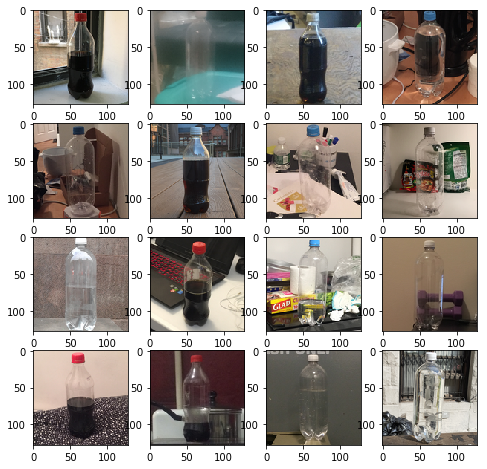

In [3]:
# Check the data and their label
import matplotlib.pyplot as plt
from __future__ import print_function

num_show = 16
mask = np.random.choice(X_train.shape[0], num_show, replace=False)
X_show = X_train[mask,:,:,:]
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        image = X_show[r*i+j]
        axarr[i][j].imshow(image,cmap="gray")
print(y_train[mask])

## Train your model here

In [4]:
# YOUR CODE HERE
num_train,height,weight,channels = X_train.shape
index = np.random.choice(num_train,num_train,replace=False)
X_train = X_train[index]
y_train = y_train[index]

num_val = int(num_train*0.05)
X_val = X_train[:num_val]
y_val = y_train[:num_val]

X_train = X_train[num_val:]
y_train = y_train[num_val:]

print(X_train.shape,X_val.shape)

(14250, 128, 128, 3) (750, 128, 128, 3)


In [18]:
tf.reset_default_graph()
my_training(X_train, y_train, X_val, y_val,
            conv_featmap=[16,16,32,32],
            fc_units=[200,100],
            conv_kernel_size=[4,4,4,4],
            pooling_size=[2,2,2,2],
            l2_norm=0.01,
            seed=235,
            learning_rate=1e-3,
            epoch=150,
            batch_size=128,
            verbose=False,
            pre_trained_model=None)

Building my LeNet. Parameters: 
conv_featmap=[16, 16, 32, 32]
fc_units=[200, 100]
conv_kernel_size=[4, 4, 4, 4]
pooling_size=[2, 2, 2, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 111
epoch 1 
Best validation accuracy! iteration:100 accuracy: 62.666666666666664%
epoch 2 
Best validation accuracy! iteration:200 accuracy: 72.93333333333334%
epoch 3 
Best validation accuracy! iteration:300 accuracy: 78.0%
epoch 4 
Best validation accuracy! iteration:400 accuracy: 78.4%
epoch 5 
Best validation accuracy! iteration:500 accuracy: 81.86666666666667%
epoch 6 
epoch 7 
Best validation accuracy! iteration:700 accuracy: 83.73333333333333%
epoch 8 
Best validation accuracy! iteration:800 accuracy: 84.4%
epoch 9 
epoch 10 
Best validation accuracy! iteration:1000 accuracy: 84.8%
Best validation accuracy! iteration:1100 accuracy: 84.93333333333334%
epoch 11 
epoch 12 
Best validation accuracy! iteration:1300 accuracy: 85.6%
epoch 13 
Best validation accuracy! iteration

In [14]:
with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
pred = prediction_on_test(X_test,'lenet_1541463314',batch_size=1000,mode='new')

INFO:tensorflow:Restoring parameters from model/lenet_1541463314


In [17]:
with open('X_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
pred2 = prediction_on_test(X_test,'lenet_1541464797',batch_size=1000,mode='new')

import csv
with open('predicted2.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()    
    for index,l in enumerate(pred2):
        filename = str(index)+'.png'
        label = str(l)
        writer.writerow({'Id': filename, 'label': label})

INFO:tensorflow:Restoring parameters from model/lenet_1541464797


## Generate .csv file for Kaggle

In [15]:
# The following code snippet can be used to generate your prediction .csv file.
import csv
with open('predicted.csv','w') as csvfile:
    fieldnames = ['Id','label']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()    
    for index,l in enumerate(pred):
        filename = str(index)+'.png'
        label = str(l)
        writer.writerow({'Id': filename, 'label': label})